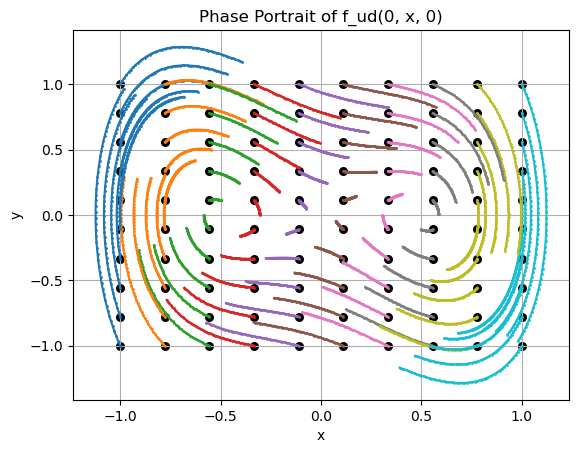

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define the uncontrolled system function f
def f(t, x):
    delta = 0.5
    beta = -1
    alpha = 1
    return 0.5 * np.array([2 * x[1], -delta * 2 * x[1] - 2 * x[0] * (beta + alpha * (2 * x[0])**2)])

# Define the controlled system function f_u
def f_u(t, x, u):
    delta = 0.5
    beta = -1
    alpha = 1
    return 0.5 * np.array([2 * x[1], -delta * 2 * x[1] - 2 * x[0] * (beta + alpha * (2 * x[0])**2) + u])

n = 2  # Number of states
m = 1  # Number of control inputs

# Discretize
deltaT = 0.01

# Runge-Kutta 4
def k1(t, x, u):
    return f_u(t, x, u)

def k2(t, x, u):
    return f_u(t, x + k1(t, x, u) * deltaT / 2, u)

def k3(t, x, u):
    return f_u(t, x + k2(t, x, u) * deltaT / 2, u)

def k4(t, x, u):
    return f_u(t, x + k1(t, x, u) * deltaT, u)

def f_ud(t, x, u):
    k_1 = k1(t, x, u)
    k_2 = k2(t, x, u)
    k_3 = k3(t, x, u)
    k_4 = k4(t, x, u)
    return x + (deltaT / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

# Create a grid of initial conditions
x_range = np.linspace(-1, 1, 10)
y_range = np.linspace(-1, 1, 10)

# Create a grid of combinations using meshgrid
X, Y = np.meshgrid(x_range, y_range)

# Stack the combinations as columns in a 2D array
initial = np.column_stack((X.ravel(), Y.ravel()))
u = 0  # Fixed control input for the phase portrait

# Initialize lists to store trajectories
x_trajectories = []
y_trajectories = []
time = 50
# Iterate through the grid of initial conditions
for i in range(initial.shape[0]):
    trajectory = [initial[i, :]]
    for j in range(time):  # Simulate for a fixed number of time steps
        x_next = f_ud(0, trajectory[-1], u)
        trajectory.append(x_next)
    trajectory = np.array(trajectory).T
    x_trajectories.append(trajectory[0, :])
    y_trajectories.append(trajectory[1, :])

# Plot the phase portrait
plt.figure()
for i in range(len(x_trajectories)):
    x = x_trajectories[i]
    y = y_trajectories[i]
    plt.plot(x, y, 'o-', markersize=1)
    # Round markers for the initial condition of each trajectory
    plt.scatter(x[0], y[0], c='black', marker='o', s=30)

plt.title('Phase Portrait of f_ud(0, x, 0)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


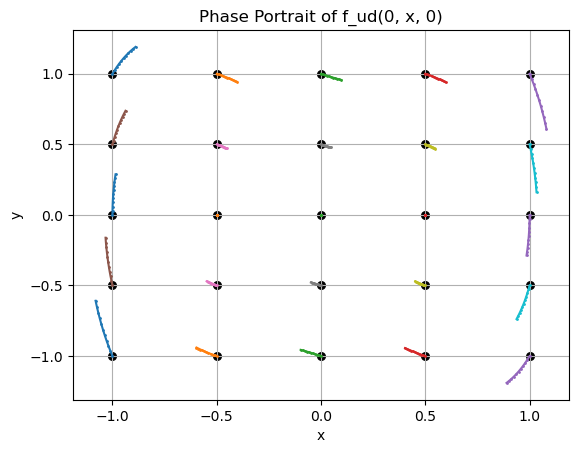

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the uncontrolled system function f
def f(t, x):
    delta = 0.5
    beta = -1
    alpha = 1
    return 0.5 * np.array([2 * x[1], -delta * 2 * x[1] - 2 * x[0] * (beta + alpha * (2 * x[0])**2)])

# Define the controlled system function f_u
def f_u(t, x, u):
    delta = 0.5
    beta = -1
    alpha = 1
    return 0.5 * np.array([2 * x[1], -delta * 2 * x[1] - 2 * x[0] * (beta + alpha * (2 * x[0])**2) + u])

n = 2  # Number of states
m = 1  # Number of control inputs

# Discretize
deltaT = 0.01

# Runge-Kutta 4
def k1(t, x, u):
    return f_u(t, x, u)

def k2(t, x, u):
    return f_u(t, x + k1(t, x, u) * deltaT / 2, u)

def k3(t, x, u):
    return f_u(t, x + k2(t, x, u) * deltaT / 2, u)

def k4(t, x, u):
    return f_u(t, x + k1(t, x, u) * deltaT, u)

def f_ud(t, x, u):
    k_1 = k1(t, x, u)
    k_2 = k2(t, x, u)
    k_3 = k3(t, x, u)
    k_4 = k4(t, x, u)
    return x + (deltaT / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

# Create a grid of initial conditions
x_range = np.linspace(-1, 1, 5)
y_range = np.linspace(-1, 1, 5)

# Create a grid of combinations using meshgrid
X, Y = np.meshgrid(x_range, y_range)

# Stack the combinations as columns in a 2D array
initial = np.column_stack((X.ravel(), Y.ravel()))
u = 0  # Fixed control input for the phase portrait

# Initialize lists to store trajectories
x_trajectories = []
y_trajectories = []
time = 10
# Iterate through the grid of initial conditions
for i in range(initial.shape[0]):
    trajectory = [initial[i, :]]
    for j in range(time):  # Simulate for a fixed number of time steps
        x_next = f_ud(0, trajectory[-1], u)
        trajectory.append(x_next)
    trajectory = np.array(trajectory).T
    x_trajectories.append(trajectory[0, :])
    y_trajectories.append(trajectory[1, :])

# Plot the phase portrait
plt.figure()
for i in range(len(x_trajectories)):
    x = x_trajectories[i]
    y = y_trajectories[i]
    plt.plot(x, y, 'o-', markersize=1)
    # Round markers for the initial condition of each trajectory
    plt.scatter(x[0], y[0], c='black', marker='o', s=30)

plt.title('Phase Portrait of f_ud(0, x, 0)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


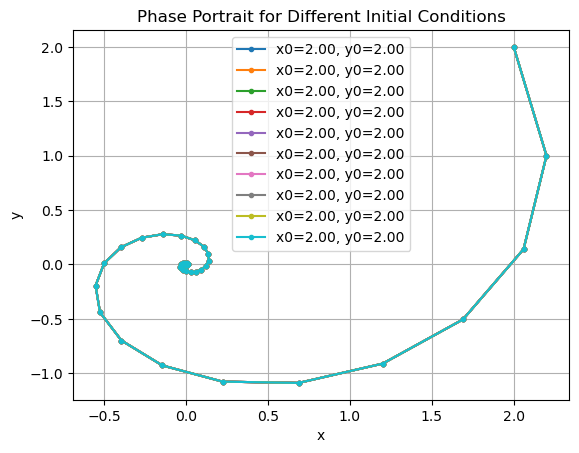